In [ ]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout, Flatten
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file path
file_path = "/content/drive/MyDrive/algae train model/algae_classification_model_2.h5"
file_path_verifyImage ="/content/drive/MyDrive/algae_data_11/Anabaena/GòÖ-ÇGò¿GòÜGòÿ-â_76.jpg"

Mounted at /content/drive


In [ ]:
# List of class names
class_labels = ['Prorocentrum',
                 'Nodularia',
                 'Oscillatoria',
                 'Karenia',
                 'Microcystis',
                 'Skeletonema',
                 'Nostoc',
                 'nontoxic',
                 'Noctiluca',
                 'Gymnodinium',
                 'Aphanizomenon',
                 'Anabaena']


1/1 [==============================] - 1s 1s/step
Predicted Class: Anabaena


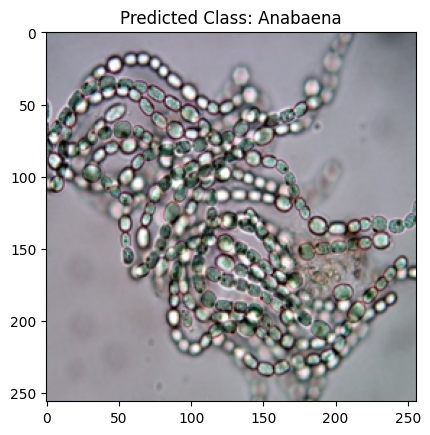

In [ ]:
# Load the saved deplaning model (assuming you saved it as 'deplaning_model.h5')
model = tf.keras.models.load_model(file_path)

# Function to preprocess an image for prediction
def preprocess_image(img_path):
  " Preprocesses an image for use with the model."
  img = image.load_img(img_path, target_size=(224, 224))  # Adjust if image size differs
  img_array = image.img_to_array(img)
  img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension
  return img_array_expanded / 255.0  # Rescale to [0, 1]

# Example usage (replace with your microplankton image path)
microplankton_image = file_path_verifyImage
preprocessed_image = preprocess_image(microplankton_image)

# Make prediction
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction)  # Get index of class with highest probability

# (Optional) Load class labels (assuming you have a list named 'class_labels')
if class_labels:
  predicted_class_name = class_labels[predicted_class]
  print(f"Predicted Class: {predicted_class_name}")
else:
  print(f"Predicted Class Index: {predicted_class}")

# (Optional) Visualize the image and predicted class (if applicable)
plt.imshow(plt.imread(microplankton_image))
plt.title(f"Predicted Class: {predicted_class_name}")  # Adjust if using class labels
plt.show()

In [ ]:
# prompt: write a python script to take microscope photo with raspberry pi camera

import os
import time
import subprocess

# Set up the camera
camera = subprocess.Popen(['raspistill', '-o', '/home/pi/image.jpg'])

# Wait for the camera to warm up
time.sleep(2)

# Take a picture
camera.kill()

# Save the picture
with open('/home/pi/image.jpg', 'rb') as f:
    image_bytes = f.read()

# Send the picture to your phone
subprocess.call(['scrcpy', '-Nr', '/home/pi/image.jpg'])

# Clean up
os.remove('/home/pi/image.jpg')

In [ ]:
# Load the saved deplaning model (assuming you saved it as 'deplaning_model.h5')
model = tf.keras.models.load_model(file_path)

# Function to preprocess an image for prediction
def preprocess_image(img_path):
  " Preprocesses an image for use with the model."
  img = image.load_img(img_path, target_size=(224, 224))
  img_array = image.img_to_array(img) / 255.0
  return np.expand_dims(img_array, axis=0)

# Load the image you want to predict
image_path = file_path_verifyImage

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(preprocessed_image)

# Print the prediction
print(prediction)